
# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **No-show appointments** dataset answers the question of whether or ot patientsshow up for their appointements based on informations collected from 100k medical appointements in Brazil.

**Dataset columns** are:
 * patientID
 * AppointementID 
 * ScheduledDay: what day the patient set up their appointment.
 * Neighborhood: Hospital location
 * Scholarship: the patient is enrolled in Brasilian welfare program Bolsa Família or not.
 * Gender: Female/male
 * Age: patient's age
 * Hipertension : whether the patient has hipertension or not.
 * Diabetes: whether the patient has diabetes or not.
 * Alcoholism: whether the patient has alcoholism or not.
 * Handcap: whether the patient has hancap or not.
 * SMS received: whether the patient received an SMS or not.
 * No-show : the patient showed up to the appointement or not.

### Question(s) for Analysis
> 
>   1. What is the percentage of people missing their appointments?
  2. Is not showing up to appointements correlated to the location of the hospital?
>   3. Is not showing up to appointements correlated to age? 
>   4. How is the No-show distributed between males and females?
>   5. Do the patients who received SMS show up more to their appointments?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [2]:
df = pd.read_csv('no_show_appointments_dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Getting the shape of our data
df.shape

(110527, 14)

In [4]:
# Getting infos about our data: data types, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



    * Our data has 110527 samples and 14 columns.
    * The data has no missing values nor duplicated rows.
    * **32.1%** of patients who received SMS miss their appointments.
    * **2.2%** of patients who have handcap miss their appointments.
    * **19.7%** of patients who have hipertension miss their appointments.
    * **7.9%** of patients who have diabetes miss their appointments.
    * **3%** of patients who are addicted to alcohol miss their appointments.
    * **9.8%** of patients who have scholarship miss their appointments.
    * Age's range of values: [-1 , 115]

### Data Cleaning 

In [6]:
# Lowercase columns name
df.columns = df.columns.str.lower().str.replace('-','_')
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
# Drop irrelevent columns
df.drop(['patientid', 'appointmentid','appointmentday'], axis = 1, inplace = True)
df.head()

,gender,scheduledday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Extract features from Datetime variable
df['scheduledday'] = df['scheduledday'].astype('Datetime64')
df ['scheduledday_month'] = df.scheduledday.dt.month
df ['scheduledday_year'] = df.scheduledday.dt.year
df ['scheduledday_day'] = df.scheduledday.dt.day
df ['scheduledday_hour'] = df.scheduledday.dt.hour
df.drop(['scheduledday'],axis = 1, inplace = True)
df

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduledday_month,scheduledday_year,scheduledday_day,scheduledday_hour
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,2016,29,18
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,2016,29,16
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,2016,29,16
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,2016,29,17
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,2016,29,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,5,2016,3,9
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,5,2016,3,7
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,4,2016,27,16
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,4,2016,27,15


In [9]:
df.no_show = df.no_show.str.replace('No','0').str.replace('Yes','1').astype(int)

In [10]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduledday_month,scheduledday_year,scheduledday_day,scheduledday_hour
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,2016,29,18
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,2016,29,16
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,2016,29,16
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,2016,29,17
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,2016,29,16


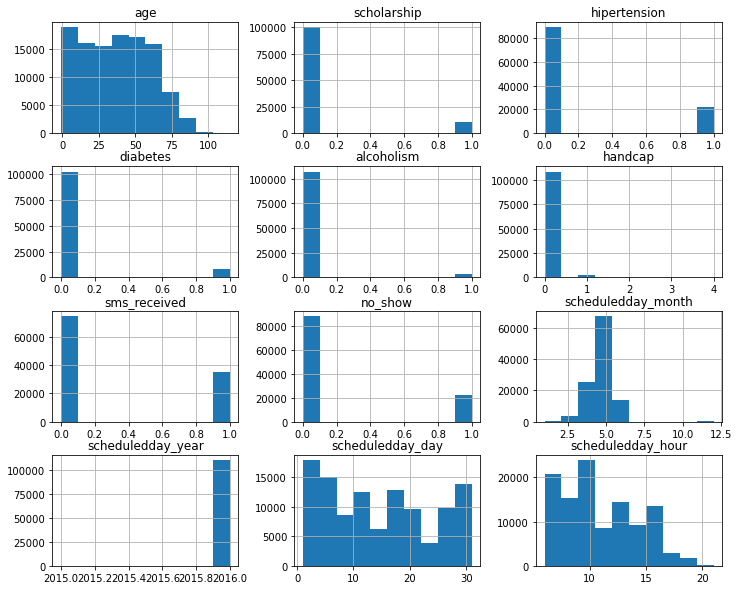

In [10]:
df.hist(figsize=(12,10));

In [12]:
df[df['age'] < 0]

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,scheduledday_month,scheduledday_year,scheduledday_day,scheduledday_hour
99832,F,-1,ROMÃO,0,0,0,0,0,0,0,6,2016,6,8


In [11]:
# Drop rows with age < 0
df.drop(df[df['age'] < 0].index, inplace = True)

In [14]:
df.shape

(110526, 14)

<a id='eda'></a>
## Exploratory Data Analysis




### Research question 1: What is the percentage of people missing their appointments?

In [14]:
show = df.no_show == False
no_show = df.no_show == True

In [16]:
show.mean()

0.7980656135208005

In [17]:
no_show.mean()

0.20193438647919945

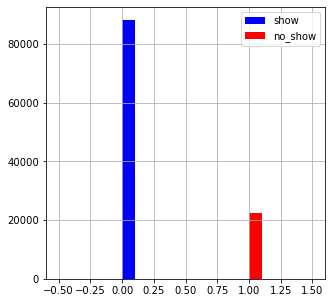

In [36]:
df.no_show[show].hist(label='show',color = 'blue')
df.no_show[no_show].hist(label='no_show',color = 'red',figsize=(5,5))
plt.legend();

* **80%** of patients show up to their appointments, **20%** don't.

### Research question 2: Is not showing up to appointements correlated with the location of the hospital?

In [19]:
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [60]:
len(df.neighbourhood.unique().tolist())

81

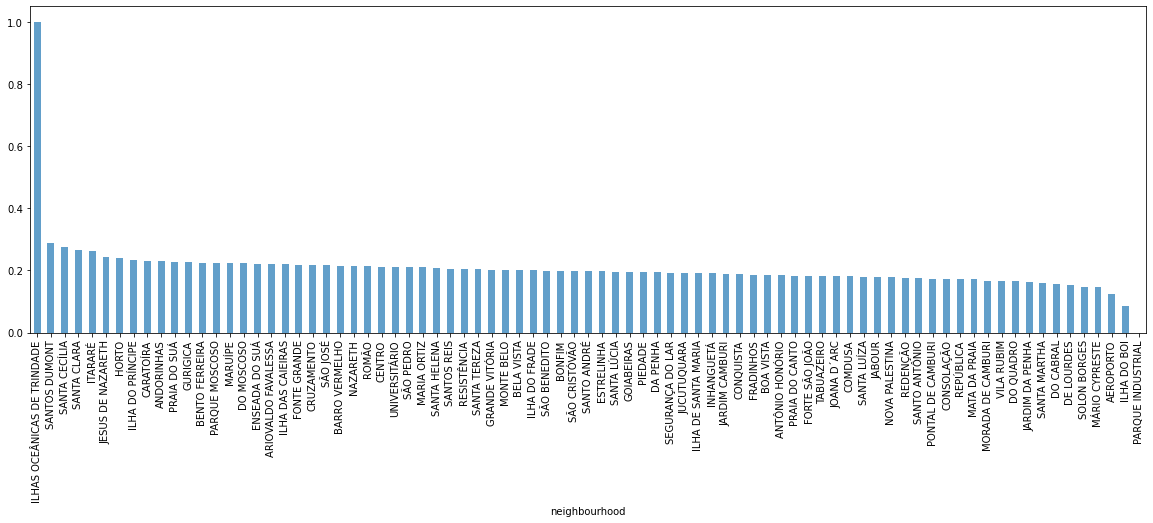

In [17]:
plt.figure(figsize = (20,6));
df.groupby('neighbourhood')['no_show'].mean().sort_values(ascending=False).plot(kind='bar', alpha=.7);

* Ilhas Oceanicas De Trindade is the hospital with highest show up rate.
* Praque Industral is the hospital with lowest show up rate.


### Research question 3: Is not showing up to appointments correlated with age?





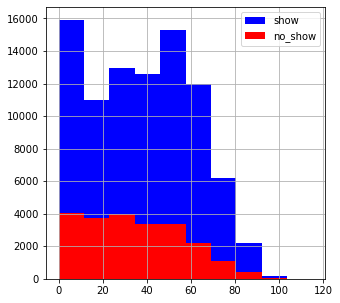

In [34]:
df.age[show].hist(label='show', color = 'blue')
df.age[no_show].hist(label='no_show',color = 'red',figsize=(5,5))
plt.legend();

* The plot shows no correlation between age and showing up to appointments.

### Research question 4: How is the No-show distributed between males and females?


In [96]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

* Females go to the doctor more than males.

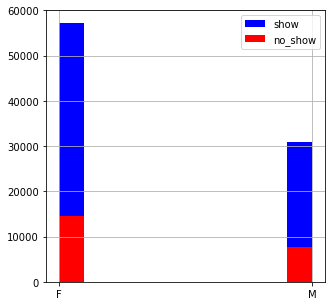

In [32]:
df.gender[show].hist(label='show',color = 'blue')
df.gender[no_show].hist(label='no_show',color = 'red',figsize=(5,5))
plt.legend();

In [27]:
df.groupby('gender')['no_show'].mean()

gender
F    0.203149
M    0.199679
Name: no_show, dtype: float64

* **20.3%** of females show up to their appointments.
* **19.9** of males show up to their appointments.

### Research question 5: Do the patients who receive SMS show up more to their appointments?

In [93]:
df.sms_received.value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

In [86]:
df.groupby('sms_received')['no_show'].mean()

sms_received
0    0.167035
1    0.275745
Name: no_show, dtype: float64

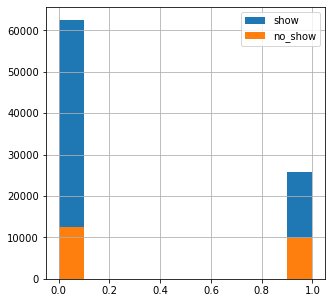

In [30]:
df.sms_received[show].hist(label='show')
df.sms_received[no_show].hist(label='no_show',figsize=(5,5))
plt.legend();

* **16.7%** of patients who didn't receive sms missed their appointments.
* **27.5%** of patients who received sms missed their appointments.

<a id='conclusions'></a>
## Conclusions
> **Conclusions:**
>   * **20.1%** of patients don't show up to their appointments.
>   * **20.3%** of females show up to their appointments.
>   * **19.9** of males show up to their appointments.
>   * **16.7%** of patients who didn't receive sms missed their appointments.
>   * **27.5%** of patients who received sms missed their appointments.
>   * Ilhas Oceanicas De Trindade is the hospital with highest show up rate.
>   * Praque Industral is the hospital with lowest show up rate.
>   * There is no correlation between age and no_show.

> **Limitations:**
>   * Number of samples in the positive class are less than those in the negative class.
>   * There are some months missing.


**Resources used**
> https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide